# Bayesian Networks with pyAgrum

Bayesian Networks (BNs) are class of Probabilistic Graphical Models that are capable to reason under uncertainty. They can be seen as a probabilistic expert system: the domain knowledge (business knowledge) is modeled as direct acyclic graph (DAG). The nodes of this DAG represent the **random variables** and the arcs between the nodes represent the **probabilistic dependencies** (correlation, causation or influence) between the variables. Morevoer, a **conditional probability table** (CPT) is associated with each node. It contains the conditional probability distribution of the node given its parents in the DAG.

In this section the famous *Visit Asia*[^1] Bayes Net shall be implemented in [pyAgrum](https://pyagrum.readthedocs.io/en/0.20.1/). 

The asia data set contains the following variables:

* D (dyspnoea), a two-level factor with levels yes and no.

* T (tuberculosis), a two-level factor with levels yes and no.

* L (lung cancer), a two-level factor with levels yes and no.

* B (bronchitis), a two-level factor with levels yes and no.

* A (visit to Asia), a two-level factor with levels yes and no.

* S (smoking), a two-level factor with levels yes and no.

* X (chest X-ray), a two-level factor with levels yes and no.

* E (tuberculosis versus lung cancer/bronchitis), a two-level factor with levels yes and no.


**Motivation:**

Shortness-of-breath (dyspnoea) may be due to tuberculosis, lung cancer or bronchitis, or none of them, or more than one of them. A recent visit to Asia increases the chances of tuberculosis, while smoking is known to be a risk factor for both lung cancer and bronchitis. The results of a single chest X-ray do not discriminate between lung cancer and tuberculosis, as neither does the presence or absence of dyspnoea.


The structure of the Bayesian Network is depicted below:

<img src="https://maucher.home.hdm-stuttgart.de/Pics/BayesNetVisitAsia.png" style="width:500px" align="center">

The **Conditional Propability Tables (CPT)** for each node are shown below:

<img src="https://maucher.home.hdm-stuttgart.de/Pics/BayesNetVisitAsiaCPT.png" style="width:500px" align="center">

In [1]:
from pylab import *
import matplotlib.pyplot as plt
import os
import pyAgrum as gum

## Create the network topology

The next line creates an empty BN network with a 'name' property.

In [2]:
bn=gum.BayesNet('Asia')
print(bn)

BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0}


### Create the variables

pyAgrum provides 3 types of variables :

* `LabelizedVariable`
* `RangeVariable`
* `DiscretizedVariable`

In this example `LabelizedVariable`, which is a variable whose domain is a finite set of labels. 

In the code cell below a variable named `A`, with 2 values and described as *visit to Asia?* is created and added to the BN. The value returned is the id of the node in the graphical structure (the DAG). pyAgrum actually distinguishes the random variable (here the `LabelizedVariable`) from its node in the DAG: the latter is identified through a numeric id. 

In [3]:
A=bn.add(gum.LabelizedVariable('A','visit to Asia?',2))
print(A)

0


In [4]:
S=bn.add(gum.LabelizedVariable('S','smoking?',2))
T=bn.add(gum.LabelizedVariable('T','tuberculosis?',2))
L=bn.add(gum.LabelizedVariable('L','lung cancer?',2))
B=bn.add(gum.LabelizedVariable('B','bronchitis?',2))
E=bn.add(gum.LabelizedVariable('E','either tuberculosis or lung cancer?',2))
D=bn.add(gum.LabelizedVariable('D','dyspnoea?',2))
X=bn.add(gum.LabelizedVariable('X','positive X-Ray?',2))

In [5]:
print (bn)

BN{nodes: 8, arcs: 0, domainSize: 256, dim: 16}


### Create the arcs

Now we have to connect nodes, i.e., to add arcs linking the nodes. Remember that <tt>c</tt> and <tt>s</tt> are ids for nodes:

In [6]:
bn.addArc(A,T)
bn.addArc(S,L)
bn.addArc(S,B)
bn.addArc(T,E)
bn.addArc(L,E)
bn.addArc(B,D)
bn.addArc(E,X)
bn.addArc(E,D)

In [7]:
print(bn)

BN{nodes: 8, arcs: 8, domainSize: 256, dim: 36}


pyAgrum provides tools to display <tt>bn</tt> in more user-frendly fashions. <br/>Notably, <tt>pyAgrum.lib</tt> is a set of tools written in pyAgrum to help using aGrUM in python. <tt>pyAgrum.lib.notebook</tt> adds dedicated functions for iPython notebook.

In [8]:
import pyAgrum.lib.notebook as gnb
bn

(gum::BayesNet<double>@0x7ff3db981200) BN{nodes: 8, arcs: 8, domainSize: 256, dim: 36}

### Create the probability tables

Once the network topology is constructed, we must initialize the conditional probability tables (CPT) distributions.

To get the CPT of a variable, the `cpt` method of the BayesNet instance with the variable's id as parameter is applied as shown below:

In [9]:
bn.cpt(A).fillWith([0.99,0.01])

(gum::Potential<double>@0x7ff3daad2240) 
  A                |
0        |1        |
---------|---------|
 0.9900  | 0.0100  |

In [10]:
bn.cpt(S).fillWith([0.5,0.5])

(gum::Potential<double>@0x7ff3da953560) 
  S                |
0        |1        |
---------|---------|
 0.5000  | 0.5000  |

In [11]:
bn.cpt(T).var_names

['A', 'T']

In [12]:
bn.cpt(T)[:]=[ [0.99,0.01],[0.95,0.05]]
bn.cpt(T)

(gum::Potential<double>@0x7ff3da954900) 
      ||  T                |
A     ||0        |1        |
------||---------|---------|
0     || 0.9900  | 0.0100  |
1     || 0.9500  | 0.0500  |

In [13]:
bn.cpt(L)[:]=[ [0.99,0.01],[0.9,0.1]]
bn.cpt(L)

(gum::Potential<double>@0x7ff3da956f90) 
      ||  L                |
S     ||0        |1        |
------||---------|---------|
0     || 0.9900  | 0.0100  |
1     || 0.9000  | 0.1000  |

In [14]:
bn.cpt(B)[:]=[ [0.7,0.3],[0.4,0.6]]
bn.cpt(B)

(gum::Potential<double>@0x7ff3da979940) 
      ||  B                |
S     ||0        |1        |
------||---------|---------|
0     || 0.7000  | 0.3000  |
1     || 0.4000  | 0.6000  |

In [15]:
bn.cpt(E).var_names

['L', 'T', 'E']

In [16]:
bn.cpt(E)[0,0,:] = [1, 0] # L=0,T=0
bn.cpt(E)[0,1,:] = [0, 1] # L=0,T=1
bn.cpt(E)[1,0,:] = [0, 1] # L=1,T=0
bn.cpt(E)[1,1,:] = [0, 1] # L=1,T=1
bn.cpt(E)

(gum::Potential<double>@0x7ff3da97a060) 
             ||  E                |
T     |L     ||0        |1        |
------|------||---------|---------|
0     |0     || 1.0000  | 0.0000  |
1     |0     || 0.0000  | 1.0000  |
0     |1     || 0.0000  | 1.0000  |
1     |1     || 0.0000  | 1.0000  |

Instead of the assignment-method applied above, one can obtain the same result by applying dictionaries. The cell below produces the same output as the cell above.

In [17]:
bn.cpt(E)[{'L': 0, 'T': 0}] = [1, 0]
bn.cpt(E)[{'L': 0, 'T': 1}] = [0,1]
bn.cpt(E)[{'L': 1, 'T': 0}] = [0,1]
bn.cpt(E)[{'L': 1, 'T': 1}] = [0,1]
bn.cpt(E)

(gum::Potential<double>@0x7ff3da97a060) 
             ||  E                |
T     |L     ||0        |1        |
------|------||---------|---------|
0     |0     || 1.0000  | 0.0000  |
1     |0     || 0.0000  | 1.0000  |
0     |1     || 0.0000  | 1.0000  |
1     |1     || 0.0000  | 1.0000  |

In [18]:
bn.cpt(D).var_names

['E', 'B', 'D']

In [19]:
bn.cpt(D)[0,0,:] = [0.9, 0.1] # E=0,B=0
bn.cpt(D)[0,1,:] = [0.2, 0.8] # E=0,B=1
bn.cpt(D)[1,0,:] = [0.3, 0.7] # E=1,B=0
bn.cpt(D)[1,1,:] = [0.1, 0.9] # E=1,B=1
bn.cpt(D)

(gum::Potential<double>@0x7ff3da97a700) 
             ||  D                |
B     |E     ||0        |1        |
------|------||---------|---------|
0     |0     || 0.9000  | 0.1000  |
1     |0     || 0.2000  | 0.8000  |
0     |1     || 0.3000  | 0.7000  |
1     |1     || 0.1000  | 0.9000  |

In [20]:
bn.cpt(X)[:]=[ [0.95,0.05],[0.02,0.98]]
bn.cpt(X)

(gum::Potential<double>@0x7ff3da97adc0) 
      ||  X                |
E     ||0        |1        |
------||---------|---------|
0     || 0.9500  | 0.0500  |
1     || 0.0200  | 0.9800  |

At this point the Bayes Net is completely specified and can be applied for arbitrary queries in the inference phase.

## Saving and Loading Bayes Nets

The specified Bayes Net can be saved in different formats. A list of supported formats can be displayed as follows:

In [21]:
print(gum.availableBNExts())

bif|dsl|net|bifxml|o3prm|uai


Here, the Bayes Net is saved in BIF format:

In [22]:
gum.saveBN(bn,os.path.join("out","VisitAsia.bif"))

In [23]:
with open(os.path.join("out","VisitAsia.bif"),"r") as out:
    print(out.read())

network "Asia" {
// written by aGrUM 0.20.1
}

variable A {
   type discrete[2] {0, 1};
}

variable S {
   type discrete[2] {0, 1};
}

variable T {
   type discrete[2] {0, 1};
}

variable L {
   type discrete[2] {0, 1};
}

variable B {
   type discrete[2] {0, 1};
}

variable E {
   type discrete[2] {0, 1};
}

variable D {
   type discrete[2] {0, 1};
}

variable X {
   type discrete[2] {0, 1};
}

probability (A) {
   default 0.99 0.01;
}
probability (S) {
   default 0.5 0.5;
}
probability (T | A) {
   (0) 0.99 0.01;
   (1) 0.95 0.05;
}
probability (L | S) {
   (0) 0.99 0.01;
   (1) 0.9 0.1;
}
probability (B | S) {
   (0) 0.7 0.3;
   (1) 0.4 0.6;
}
probability (E | T, L) {
   (0, 0) 1 0;
   (1, 0) 0 1;
   (0, 1) 0 1;
   (1, 1) 0 1;
}
probability (D | B, E) {
   (0, 0) 0.9 0.1;
   (1, 0) 0.2 0.8;
   (0, 1) 0.3 0.7;
   (1, 1) 0.1 0.9;
}
probability (X | E) {
   (0) 0.95 0.05;
   (1) 0.02 0.98;
}




We load the BN, which has been saved previously. What we get is actually what we saved:

In [24]:
bn2=gum.loadBN(os.path.join("out","VisitAsia.bif"))
bn2

(gum::BayesNet<double>@0x7ff3db075200) BN{nodes: 8, arcs: 8, domainSize: 256, dim: 36}

In [25]:
bn2.cpt(D)

(gum::Potential<double>@0x7ff3dee29960) 
             ||  D                |
B     |E     ||0        |1        |
------|------||---------|---------|
0     |0     || 0.9000  | 0.1000  |
1     |0     || 0.2000  | 0.8000  |
0     |1     || 0.3000  | 0.7000  |
1     |1     || 0.1000  | 0.9000  |

In this way you can easily load arbitrary Bayesian Networks, e.g. from [here](https://www.bnlearn.com/bnrepository/).

## Markov Blanket

The Markov blanket of a node $X$ is the set of nodes $M\!B(X)$ such that $X$ is independent from the rest of the nodes given $M\!B(X)$. The Markov Blanket can be visualized as follows:

In [26]:
gum.MarkovBlanket(bn,"E")

<pyAgrum.pyAgrum.MarkovBlanket; proxy of <Swig Object of type 'gum::MarkovBlanket *' at 0x7ff3df58b8d0> >

In [27]:
gum.MarkovBlanket(bn,"B")

<pyAgrum.pyAgrum.MarkovBlanket; proxy of <Swig Object of type 'gum::MarkovBlanket *' at 0x7ff3df5b9b70> >

## Inference in Bayesian networks

In the inference phase an engine must calculate probabilities, which are queried. PyAgrum provides two inference engines:

* **LazyPropagation**: an exact inference method that transforms the Bayesian network into a hypergraph called a join tree or a junction tree. This tree is constructed in order to optimize inference computations.

* **Gibbs**: an approximate inference engine using the Gibbs sampling algorithm to generate a sequence of samples from the joint probability distribution.
        


In a small example like this, `LazyPropagation` can be applied:

In [28]:
ie=gum.LazyPropagation(bn)

### Inference without evidence

Calculate $P(L)$:

In [29]:
ie.makeInference()
print (ie.posterior(L))


  L                |
0        |1        |
---------|---------|
 0.9450  | 0.0550  |



Calculate $P(X)$:

In [30]:
ie.makeInference()
print (ie.posterior(D))


  D                |
0        |1        |
---------|---------|
 0.5640  | 0.4360  |



Calculate Joint Probability $P(S,B,X)$:

In [31]:
ie.addJointTarget(set([S,B,X]))

In [32]:
ie.jointPosterior(set([S,B,X]))

(gum::Potential<double>@0x7ff3de171610) 
             ||  S                |
X     |B     ||0        |1        |
------|------||---------|---------|
0     |0     || 0.3259  | 0.1697  |
1     |0     || 0.0241  | 0.0303  |
0     |1     || 0.1397  | 0.2545  |
1     |1     || 0.0103  | 0.0455  |

### Inference with evidence

As demonstrated below, the probability for *lung cancer* without evidence is $0.055$. Suppose, that we now know the patient is smoker. Does this evidence increase the probability for *lung cancer*? 

As shown below, evidence can be entered using a dictionary. When you know precisely the value taken by a random variable, the evidence is called a hard evidence. This is the case, for instance, when you know for sure that the patient is a smoker. In this case, the knowledge is entered in the dictionary as `variable name: label`:

In [33]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
ie.setEvidence({'S':1})
ie.makeInference()
ie.posterior(L)

(gum::Potential<double>@0x7ff3df9135a0) 
  L                |
0        |1        |
---------|---------|
 0.9000  | 0.1000  |

The probability for lung cancer almost doubled, if we know that the patient is a smoker. 
And if we additionally know, that X-Ray test has been positive?

In [34]:
ie.setEvidence({'S':1, 'X':1})
ie.makeInference()
ie.posterior(L)

(gum::Potential<double>@0x7ff3de5dd330) 
  L                |
0        |1        |
---------|---------|
 0.3540  | 0.6460  |

When you have **incomplete knowledge** about the value of a random variable, this is called a **soft evidence**. In this case, this evidence is entered as the belief you have over the possible values that the random variable can take, in other words, as *P(evidence|true value of the variable)*. 
Imagine for example that you think that if the patient is not smoking, you have only 50% chances of knowing it, but if he is a smoker, you are sure to know it. Then, your belief about the smoker-state of the patient is [0.5, 1]. Below it is demonstrated how this belief is entered:

In [35]:
ie.setEvidence({'S': [0.5, 1.0]})
ie.makeInference()
ie.posterior(L) # using gnb's feature

(gum::Potential<double>@0x7ff3da9fba10) 
  L                |
0        |1        |
---------|---------|
 0.9300  | 0.0700  |

the pyAgrum.lib.notebook utility proposes certain functions to graphically show distributions.

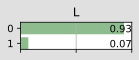

In [36]:
gnb.showProba(ie.posterior(L))

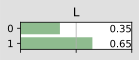

In [37]:
gnb.showPosterior(bn,{'S':1,'X':1},'L')

## Inference in the whole Bayes net

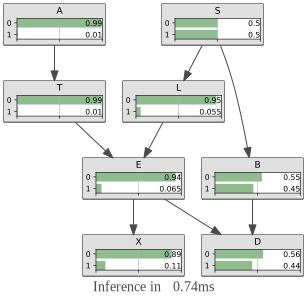

In [38]:
gnb.showInference(bn,evs={})

### Inference with evidence

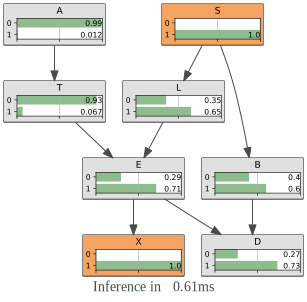

In [39]:
gnb.showInference(bn,evs={'S':1,'X':1})

### Inference with soft and hard evidence

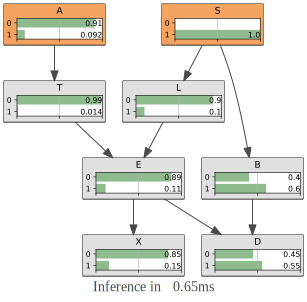

In [40]:
gnb.showInference(bn,evs={'S':1,'A':[0.1,1]})

[^1]: Lauritzen S, Spiegelhalter D (1988). *Local Computation with Probabilities on Graphical Structures and their Application to Expert Systems (with discussion)*. Journal of the Royal Statistical Society: Series B, 50(2):157–224.